# Chapter 1 - Manim in Jupyter
**Latest update : 16.6.2021**  

Working with manim in jupyter notebooks has several advantages:

* code snippets and rendered outputs are close together
* easy to iterate examples
* easy to try different varieties of one scene in multiple cells
* computation intensive code can be executed separately from the scenes
* global Mobjects can be used in multiple scenes.
* more can bee seen in chapter 4

## Simple Example

First, we need to import manim

In [4]:
from manim import *

Now we build up our scene

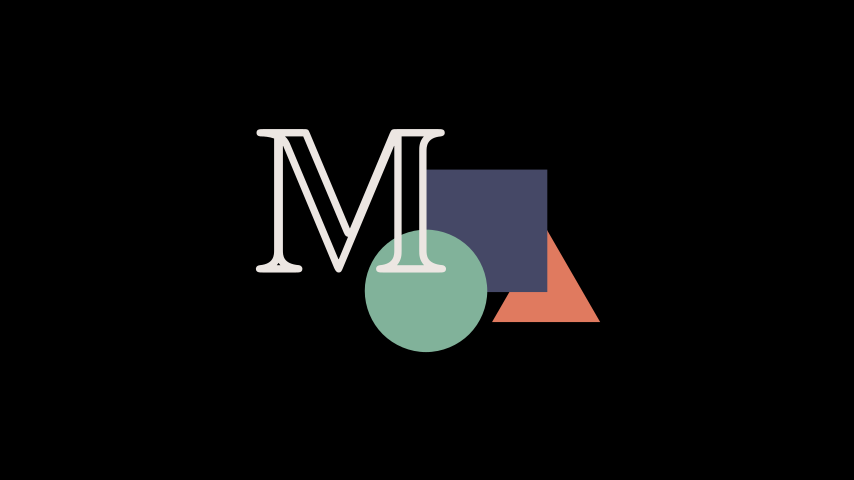

In [8]:
%%manim -v WARNING  --progress_bar None -s -ql --disable_caching MyExample
class MyExample(Scene):
    def construct(self):
        m= ManimBanner()
        self.add(m)

Note, that I use the following parameters:  

* `-v WARNING` means that only warnings are shown in the log  
* `--progress_bar None` will not show the animation progress bar   
* `-s ` will only show the last frame  
* `-ql` renders in low quality  
* `--disable_caching` will disable the manim caching system  
* `MyExample` gives the scene name  

for rendering a video, just remove the -s flag. To lower the resolution, you can use -r 400,200  (pixel values in x and y direction).

In [9]:
%%manim -v WARNING  --progress_bar None  -r 400,200  --disable_caching HelloManim
class HelloManim(Scene):
    def construct(self):
        self.camera.background_color = "#ece6e2"
        banner_large = ManimBanner(dark_theme=False).scale(0.7)
        self.play(banner_large.create())
        self.play(banner_large.expand())

We can define the parameters as a string `params` and call this string by the cell magic with `$params`

In [10]:
params = "-v WARNING  -s -ql  --disable_caching Example"
paramsSMALL = "-v WARNING -r 400,200 -s  --disable_caching Example"

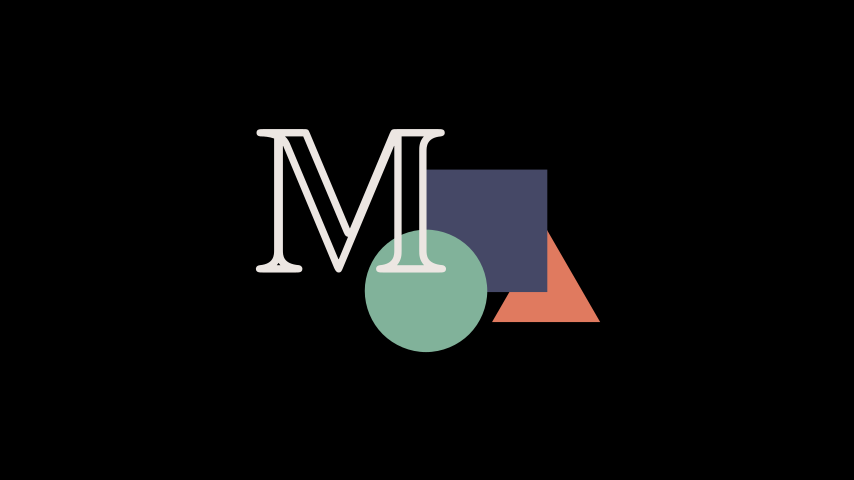

In [11]:
%%manim $params
class Example(Scene):
    def construct(self):
        m= ManimBanner()
        self.add(m)

## Initializing Mobjects Outside the Class
In some cases, it might be convenient to define mobjects outside the `Scene` class (e.g. for uncluttering or for speeding up the animation).

In [ ]:
m = ManimBanner()

In [ ]:
%%manim $paramsSMALL
class Example(Scene):
    def construct(self):
        m.scale(0.4        )
        m.shift(1.5*UP)
        self.add(m)

Because the mobject is manipulated in the class, the next cell might show some unexpected scaling and shifting:

In [ ]:
%%manim $paramsSMALL
class Example(Scene):
    def construct(self):
        m.scale(0.4)
        m.shift(1.5*UP)
        self.add(m)

To aviod this, it is better to add only a copy of these mobjects to scenes, and keep the originals untouched:

In [ ]:
m_reference = ManimBanner()

In [ ]:
%%manim $paramsSMALL
class Example(Scene):
    def construct(self):
        m = m_reference.copy()
        m.scale(0.4)
        m.shift(2*UP)
        self.add(m)

In [ ]:
%%manim $paramsSMALL
class Example(Scene):
    def construct(self):
        m = m_reference.copy()
        m.scale(0.4)
        m.shift(2*UP)
        self.add(m)

## Defining Global Mobjects
When you have to build complex scenes, you might want to use parts of that scene for your next scene. That is possible with global variables, which can be accessed in any other scene.

In [ ]:
%%manim $paramsSMALL
class Example(Scene):
    def construct(self):
        stars= VGroup()
        for i in range(0,20):
            s= Star(color= random_bright_color(), fill_opacity=1).scale(0.8)
            stars.add(s)
        stars.arrange_in_grid()        
        self.add(stars)
        global favoritstar
        favoritstar = stars[9]

In [ ]:
%%manim $paramsSMALL
class Example(Scene):
    def construct(self):
        self.add(favoritstar)

## Pre-Execute Slow Code
In this example, calculating a random walk for 500 particles and 100000 steps takes about 4 seconds.  
This step can be done before the actual scene construction, which takes about 0.2 seconds.  
Making aesthetic changes to the scene will then become easier.  
Note: The `%%time` command will print the execution time of the cells.

In [ ]:
%%time
np.random.seed(20)
steps = np.random.choice(a=[-1, 0, 1], size=(100000,1000))
stop = steps.cumsum(0)
end_points= stop[-1]/stop[-1].max() 
end_pointsX = end_points[0:499]
end_pointsY = end_points[500:-1]

In [ ]:
%%time
%%manim $params
class Example(Scene):
    def construct(self):
        radius= (end_pointsX*end_pointsX + end_pointsY * end_pointsY)**0.5
        dots = VGroup()
        for  x,y,r in zip(end_pointsX, end_pointsY,radius):
            c= interpolate_color(YELLOW, RED, r)
            dots.add(Dot(color=c,point=[3*x,3*y,0]).scale(0.7))
        self.add(dots)

## Installing plugins
plugins can be found at https://plugins.manim.community/

In [1]:
!pip install manim-rubikscube

     |████████████████████████████████| 33.3 MB 843 kB/s eta 0:00:01


In [24]:
%%manim -v WARNING  --progress_bar None  -ql --disable_caching Example

from manim_rubikscube import *

class Example(ThreeDScene):
    def construct(self):
        cube = RubiksCube().scale(0.6)
        self.add(cube)
        self.set_camera_orientation(phi=50*DEGREES, theta=160*DEGREES)
        self.renderer.camera.frame_center = cube.get_center()
        self.play(CubeMove(cube, "F"))
        self.play(CubeMove(cube, "U2"), run_time=2)
        self.play(CubeMove(cube, "R'"))
        self.wait(0.5)